**Credits to lecture notes and various online sources. **

#Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Uploading and inspecting the data

In [ ]:
#libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import os

import seaborn as sns

import xgboost as xgb
from xgboost.sklearn import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV

from scipy import stats
from scipy.stats import zscore

from numpy import mean
from numpy import absolute
from numpy import sqrt

def load_data(concrete_path):
    csv_path = os.path.join(concrete_path, "Concrete_Data_Yeh.csv")
    return pd.read_csv(csv_path)

In [ ]:
#concrete = load_data("concrete")
concrete = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mini Project_TC6244_LTH_P107443/Concrete_Data_Yeh.csv")
concrete.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
concrete.info() #data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


-No null/missing values

-All numeric

In [ ]:
concrete.describe() #stat of the data

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


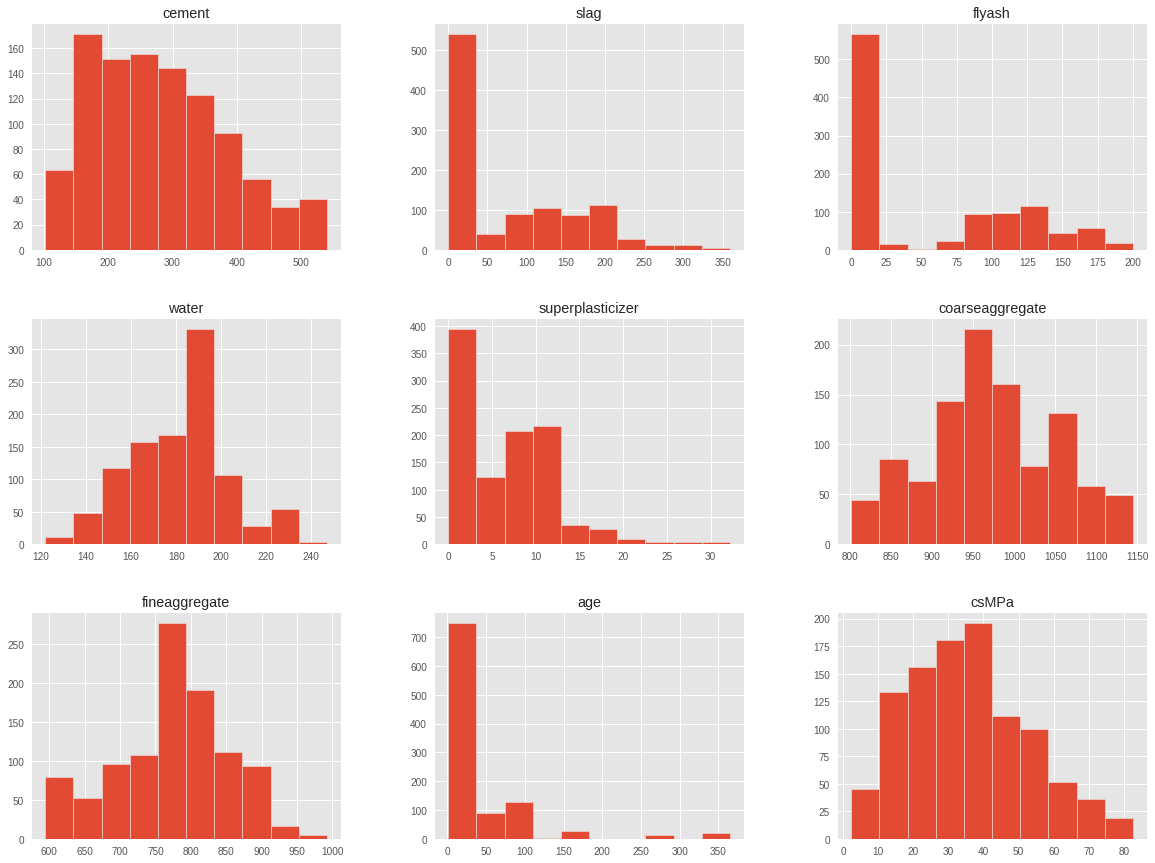

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt #histogram plotting

concrete.hist(figsize=(20,15))
plt.show()

In [ ]:
concrete.shape #check shape

(1030, 9)

In [ ]:
concrete.isnull().sum() #missing value check

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

#Visualize using AutoViz

In [ ]:
!pip install autoviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Shape of your Data Set loaded: (1030, 9)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  8
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    9 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 36


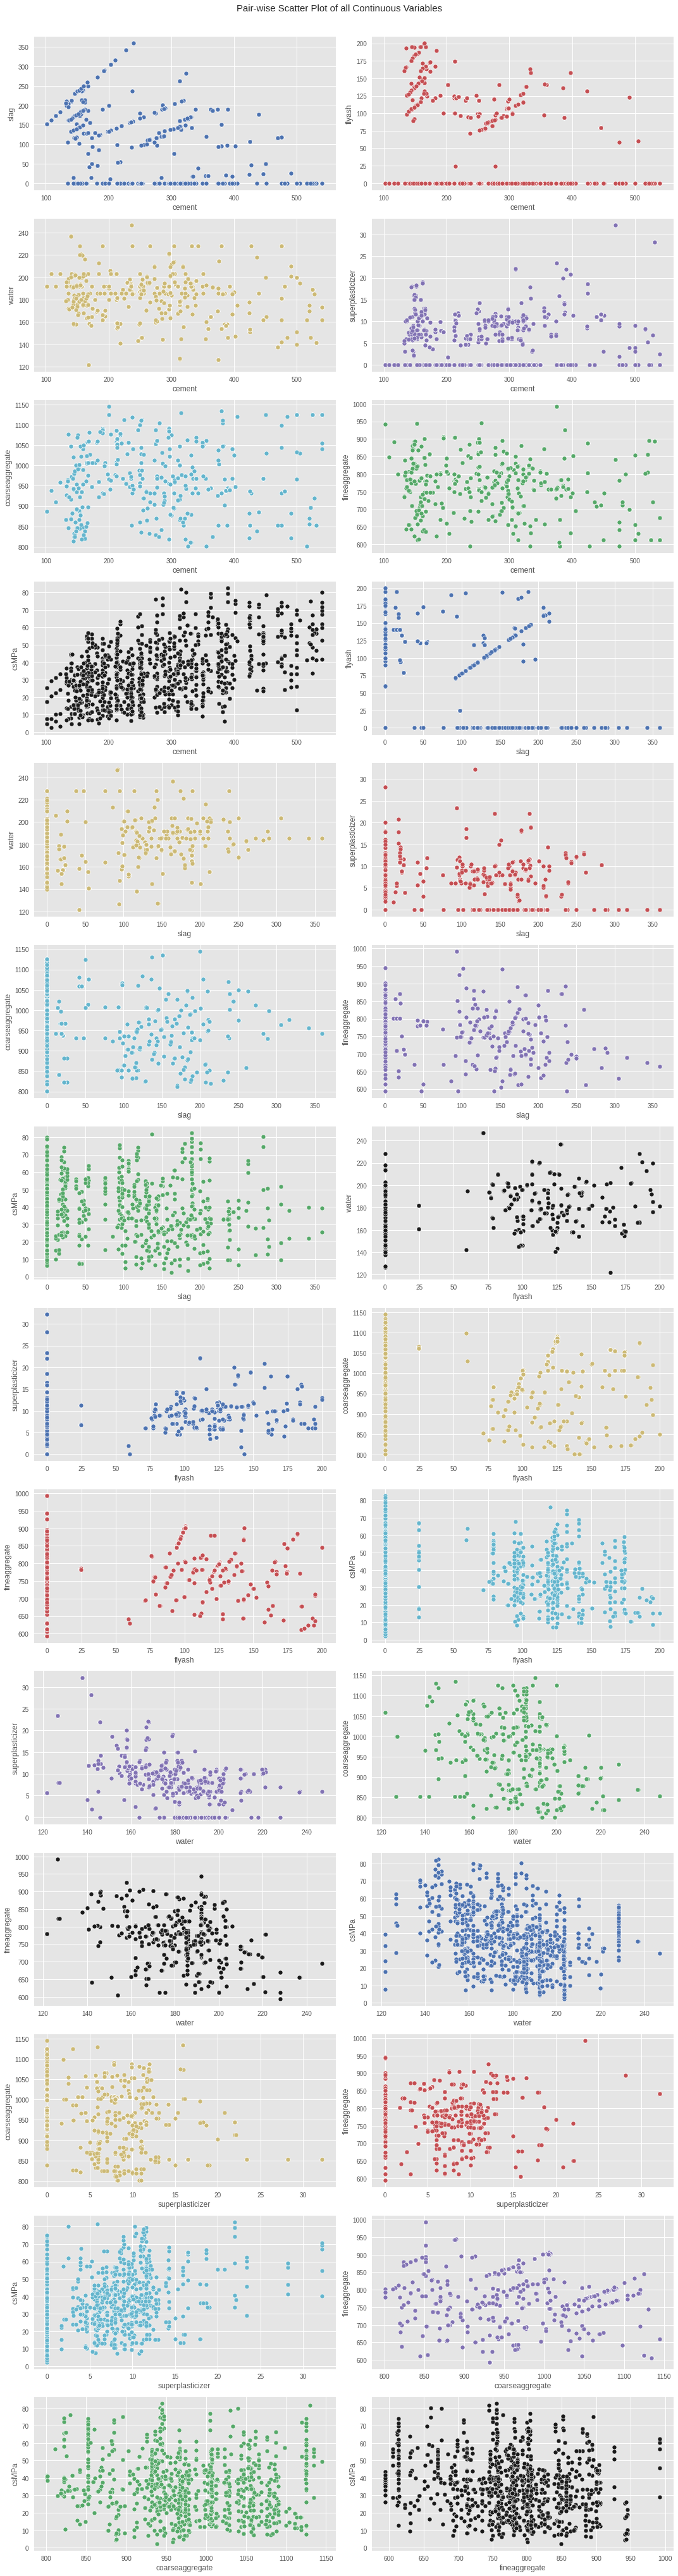

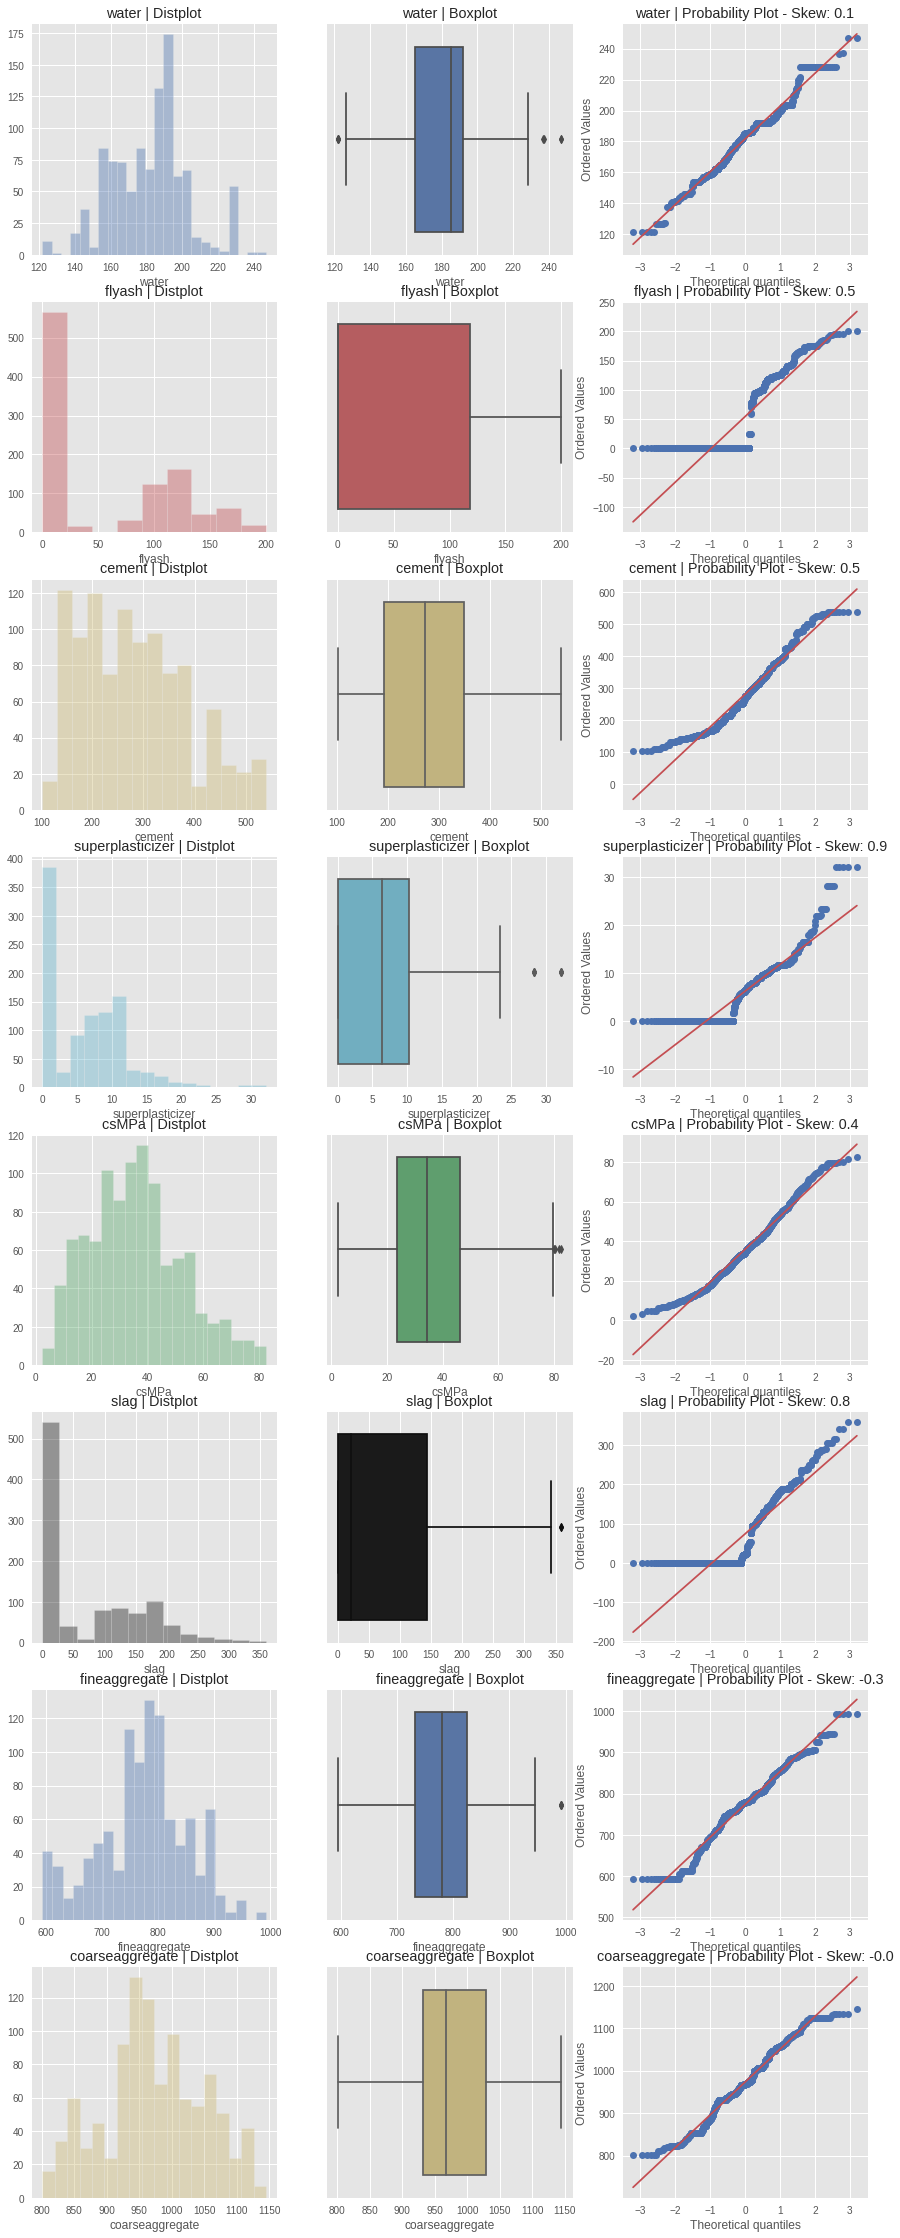

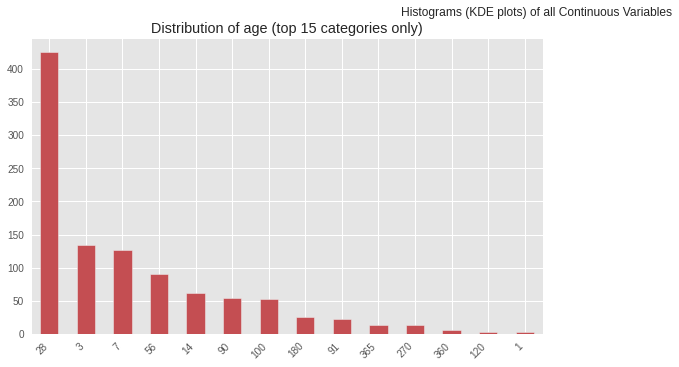

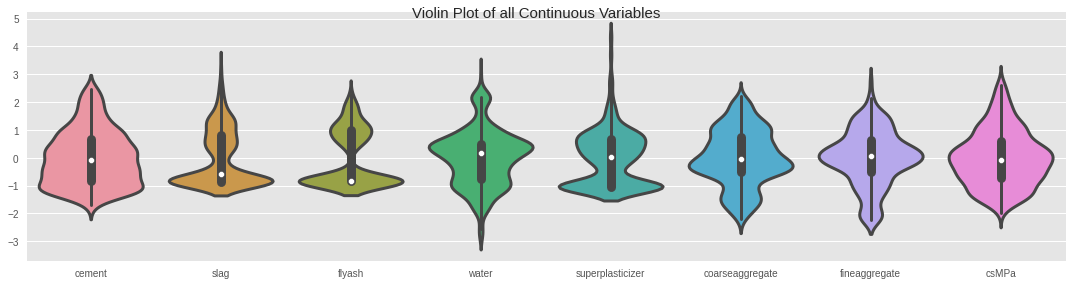

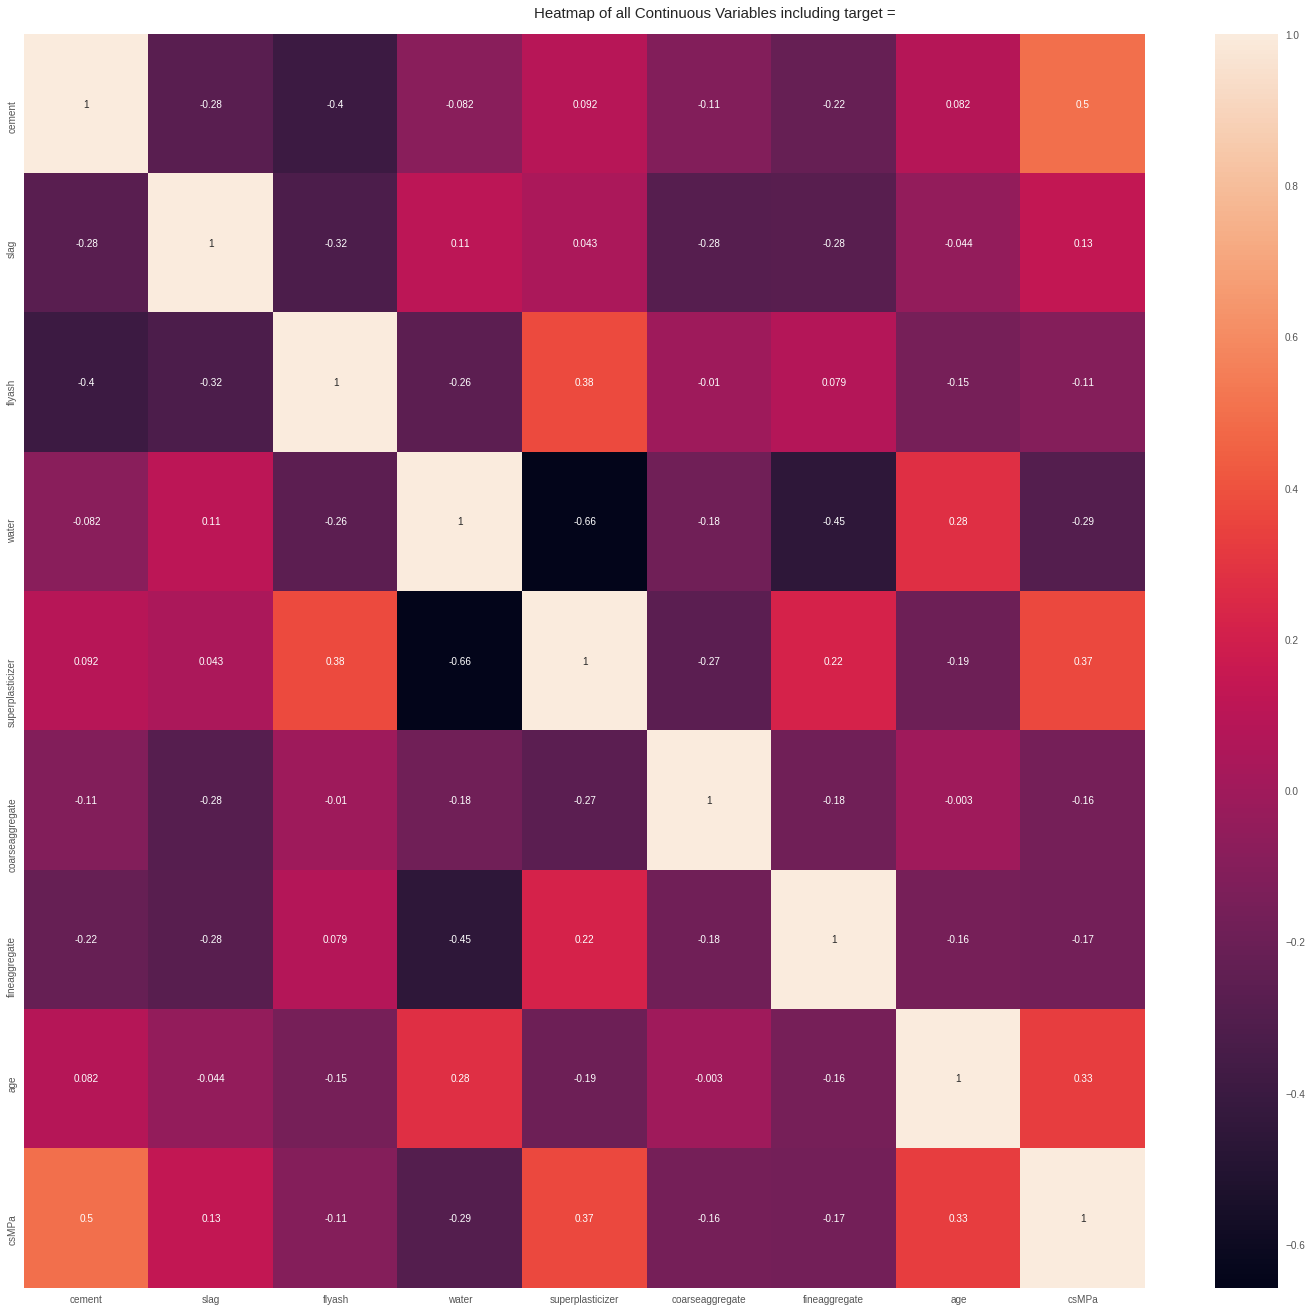

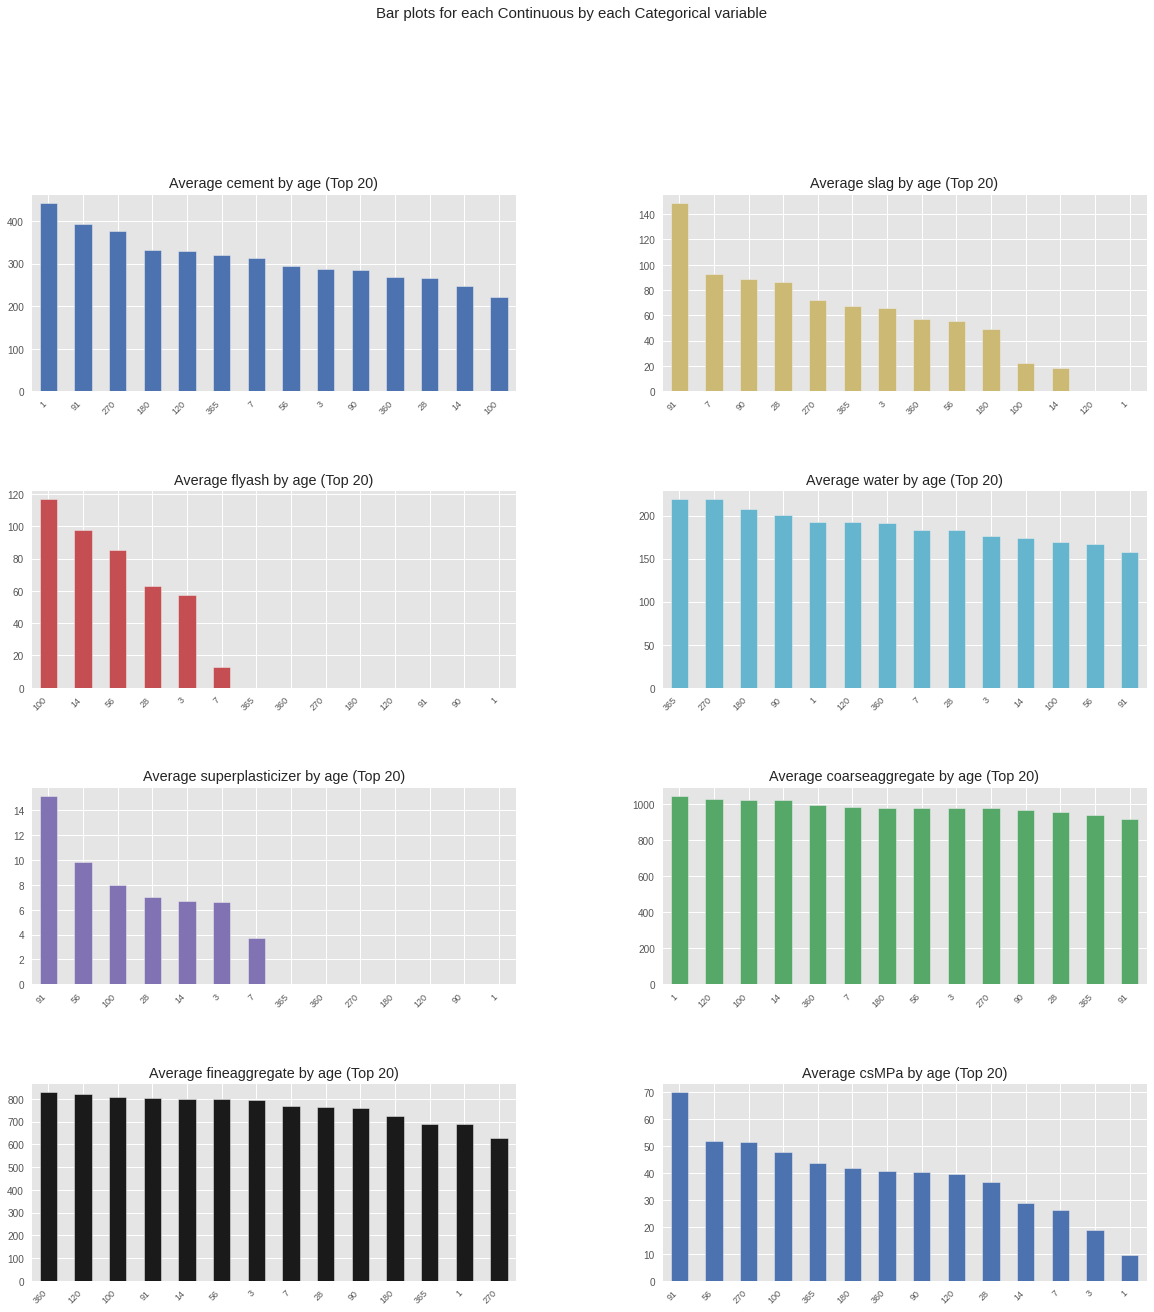

Time to run AutoViz (in seconds) = 22.586

 ###################### VISUALIZATION Completed ########################


In [ ]:
filename = "/content/drive/MyDrive/Colab Notebooks/Mini Project_TC6244_LTH_P107443/Concrete_Data_Yeh.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

#EDA

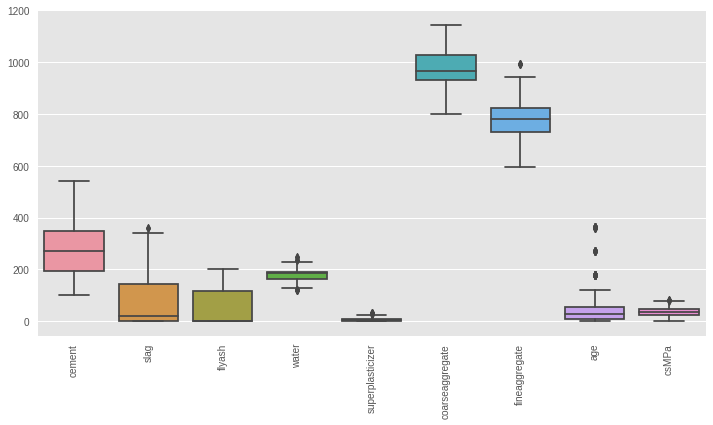

In [ ]:
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=concrete)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

Outliers in slag, water, superplasticizer, fineaggregate, age and csMPa

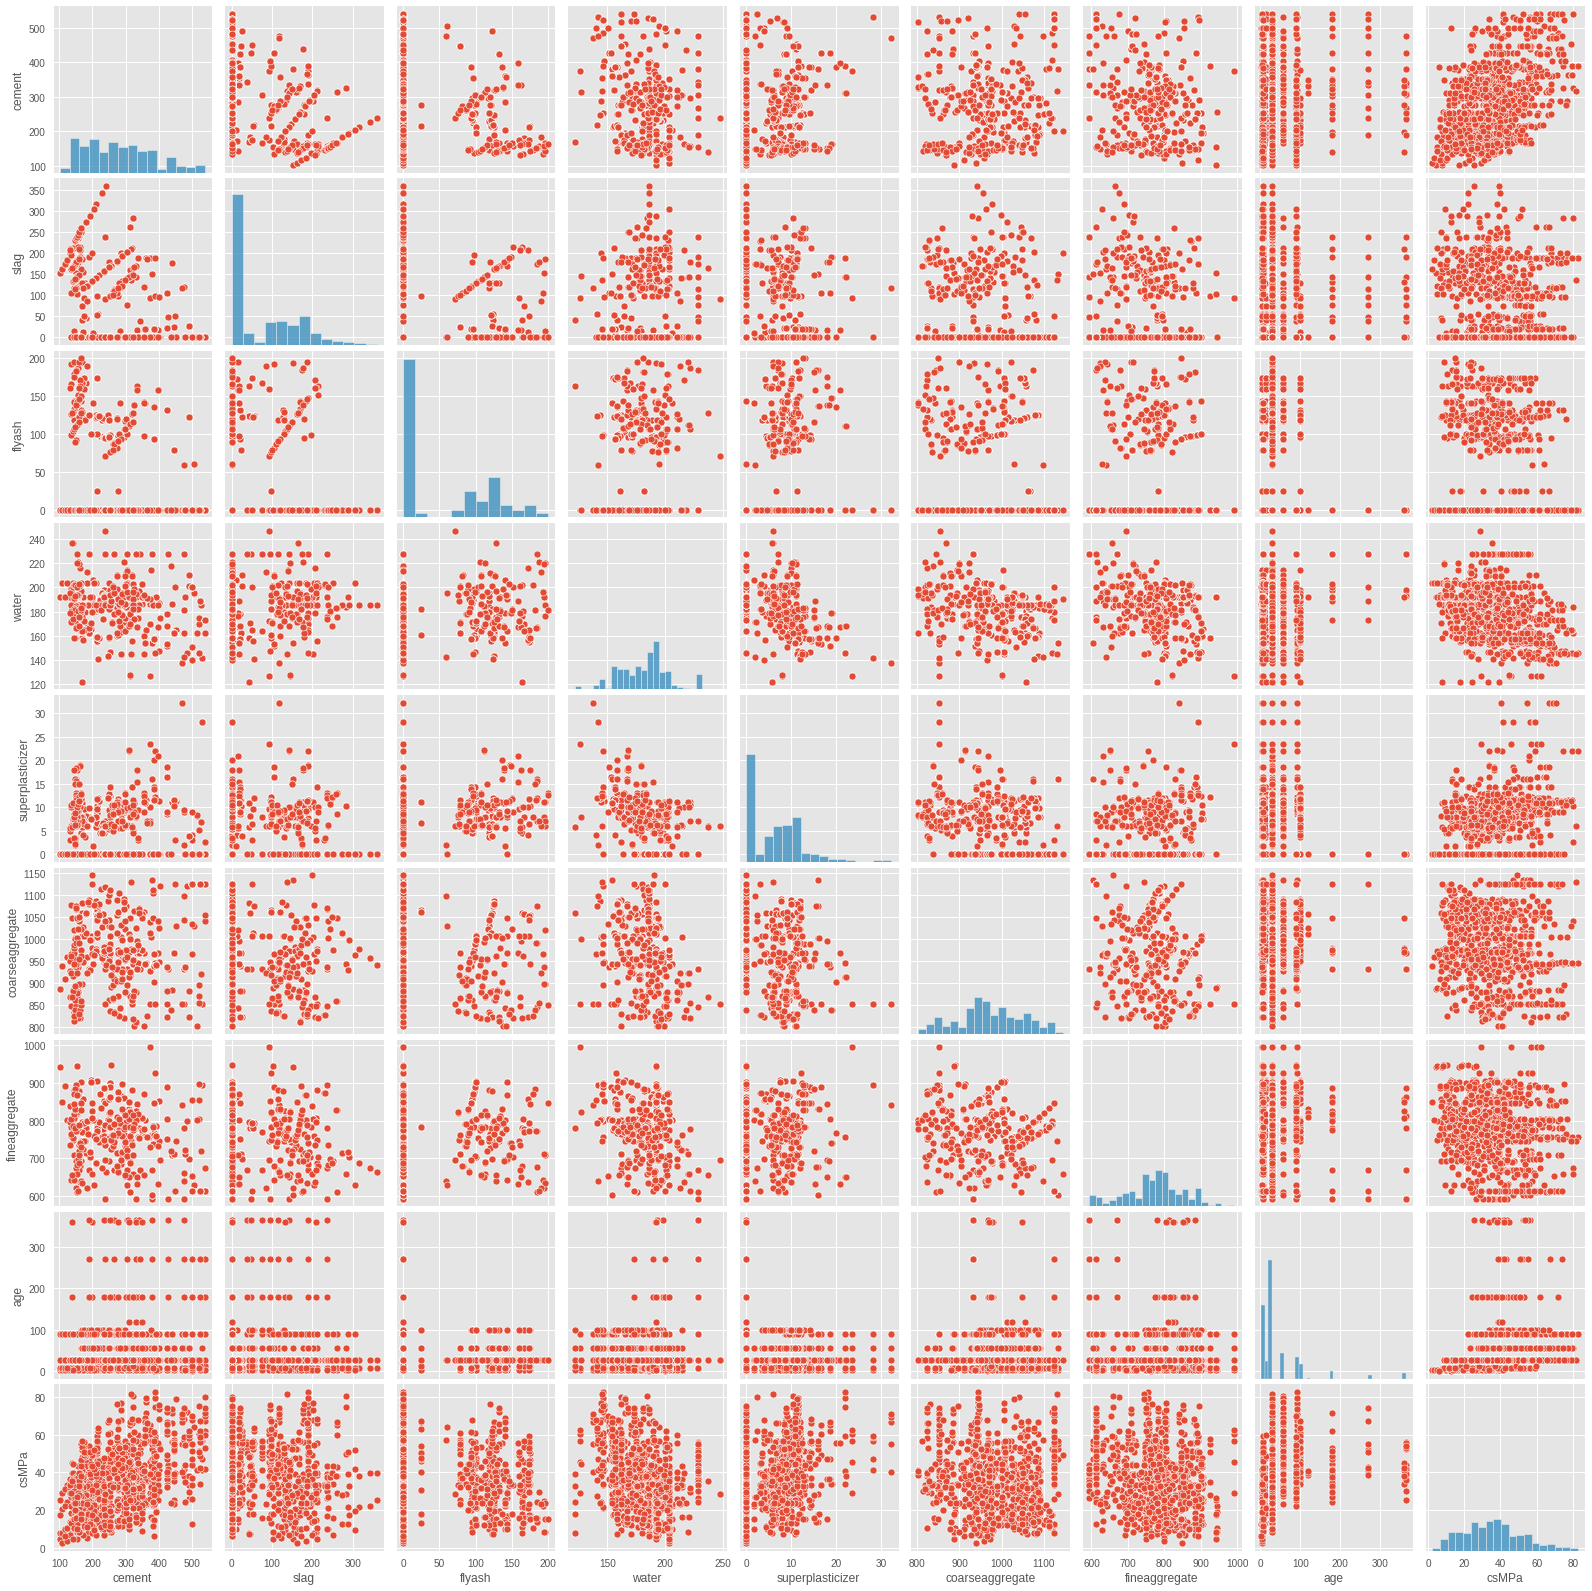

In [ ]:
sns.pairplot(concrete)

[Text(0.5, 0, 'cement'),
 Text(1.5, 0, 'slag'),
 Text(2.5, 0, 'flyash'),
 Text(3.5, 0, 'water'),
 Text(4.5, 0, 'superplasticizer'),
 Text(5.5, 0, 'coarseaggregate'),
 Text(6.5, 0, 'fineaggregate'),
 Text(7.5, 0, 'age'),
 Text(8.5, 0, 'csMPa')]

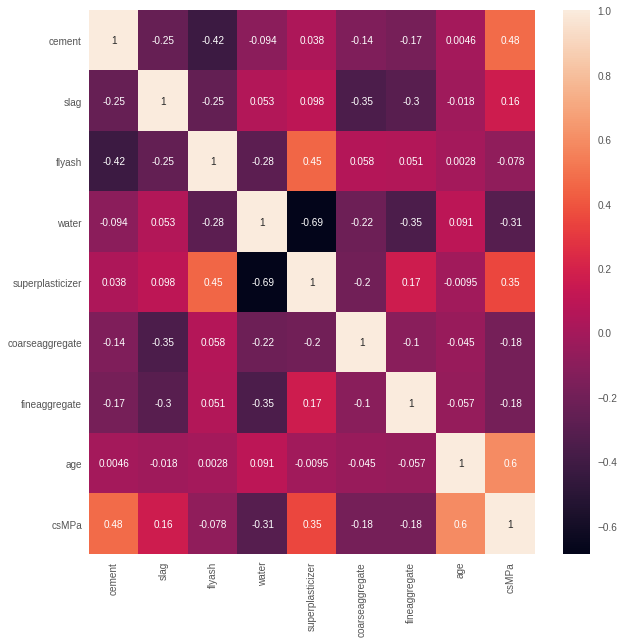

In [ ]:
plt.subplots(figsize=(10, 10))
corr = concrete.corr('spearman')

ax = sns.heatmap(data=corr, cmap='rocket', annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [ ]:
corr_matrix = concrete.corr()
corr_matrix

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [ ]:
corr_matrix["csMPa"].sort_values(ascending=False)

csMPa               1.000000
cement              0.497832
superplasticizer    0.366079
age                 0.328873
slag                0.134829
flyash             -0.105755
coarseaggregate    -0.164935
fineaggregate      -0.167241
water              -0.289633
Name: csMPa, dtype: float64

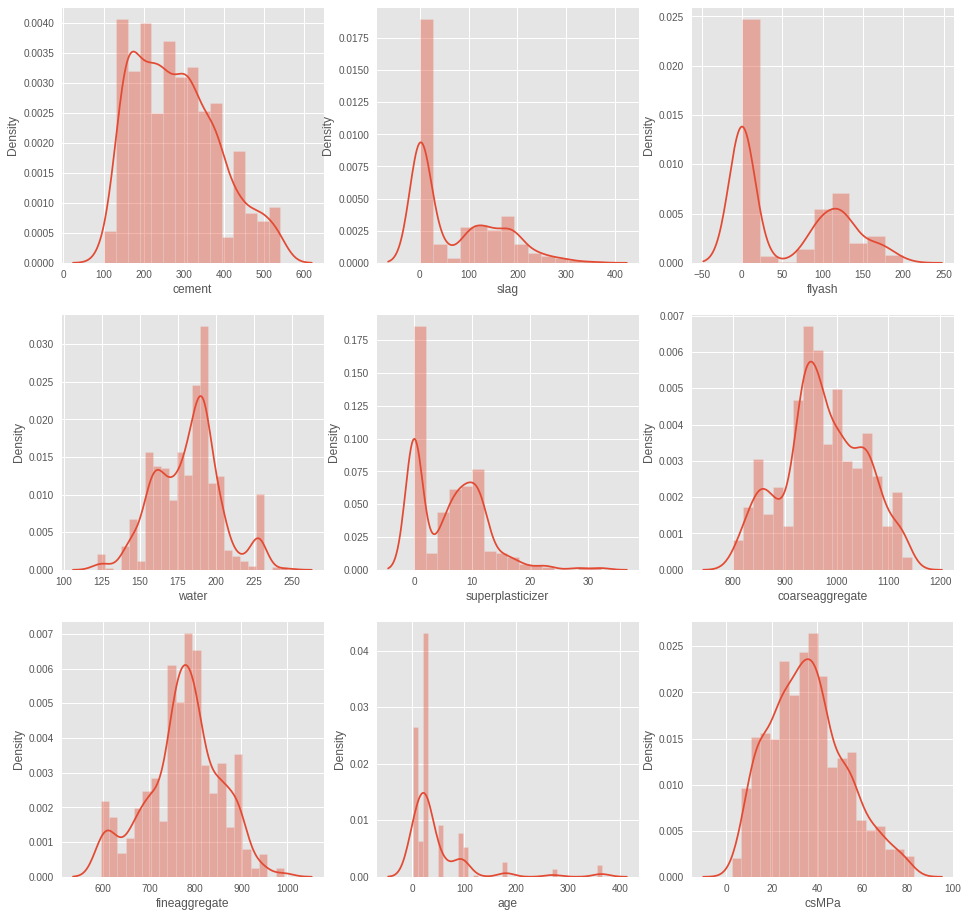

In [ ]:
fig, ax2 = plt.subplots (3, 3, figsize=(16, 16)) 
sns.distplot(concrete['cement'], ax=ax2 [0][0])
sns.distplot(concrete['slag'], ax=ax2 [0] [1])
sns.distplot(concrete['flyash'], ax=ax2 [0] [2])
sns.distplot(concrete['water'], ax=ax2 [1] [0])
sns.distplot(concrete['superplasticizer'], ax=ax2 [1] [1])
sns.distplot(concrete['coarseaggregate'], ax=ax2 [1] [2])
sns.distplot(concrete['fineaggregate'], ax=ax2 [2] [0])
sns.distplot(concrete['age'], ax=ax2 [2] [1])
sns.distplot(concrete['csMPa'], ax=ax2 [2] [2])

-normal/approximately normal

-needs scaling

In [ ]:
print('Outliers in cement: ',concrete[((concrete.cement - concrete.cement.mean()) / concrete.cement.std()).abs() >3] ['cement'].count()) 
print('Outliers in slag: ',concrete[((concrete.slag - concrete.slag.mean()) / concrete.slag.std()).abs() >3]['slag'].count())
print('Outliers in flyash: ',concrete[((concrete.flyash - concrete.flyash.mean()) /concrete.flyash.std()).abs() >3] ['flyash'].count())
print('Outliers in water: ',concrete[((concrete.water - concrete.water.mean()) / concrete.water.std()).abs() >3]['water'].count()) 
print('Outliers in superplasticizer: ',concrete[((concrete.superplasticizer - concrete.superplasticizer.mean()) /concrete.superplasticizer.std()).abs() >3]['superplasticizer'].count())
print('Outliers in coarseaggregate: ',concrete[((concrete.coarseaggregate - concrete.coarseaggregate.mean()) /concrete.coarseaggregate.std()).abs() >3] ['coarseaggregate'].count()) 
print('Outliers in fineaggregate: ',concrete[((concrete.fineaggregate - concrete.fineaggregate.mean()) /concrete.fineaggregate.std()).abs() >3] ['fineaggregate'].count())
print('Outliers in age: ',concrete[((concrete.age -concrete.age.mean()) /concrete.age.std()).abs() >3] ['age'].count())

Outliers in cement:  0
Outliers in slag:  4
Outliers in flyash:  0
Outliers in water:  2
Outliers in superplasticizer:  10
Outliers in coarseaggregate:  0
Outliers in fineaggregate:  0
Outliers in age:  33


In [ ]:
#Quartiles
#Slag
Q1 = concrete['slag'].quantile(q = 0.25)
Q3 = concrete['slag'].quantile(q = 0.75)
print(Q1)
print(Q3)
#water
Q1 = concrete['water'].quantile(q = 0.25)
Q3 = concrete['water'].quantile(q = 0.75)
print(Q1)
print(Q3)
#superplasticizer
Q1 = concrete['superplasticizer'].quantile(q = 0.25)
Q3 = concrete['superplasticizer'].quantile(q = 0.75)
print(Q1)
print(Q3)
#age
Q1 = concrete['age'].quantile(q = 0.25)
Q3 = concrete['age'].quantile(q = 0.75)
print(Q1)
print(Q3)

0.0
142.95
164.9
192.0
0.0
10.2
7.0
56.0


In [ ]:
for cols in concrete.columns[:-1]:
    Q1 = concrete[cols].quantile(0.25)
    Q3 = concrete[cols].quantile(0.75)
    iqr = Q3 - Q1

    low = Q1 - 1.5*iqr
    high = Q3 + 1.5*iqr
    concrete.loc[(concrete[cols] < low)|(concrete[cols] > high), cols] = concrete[cols].median()

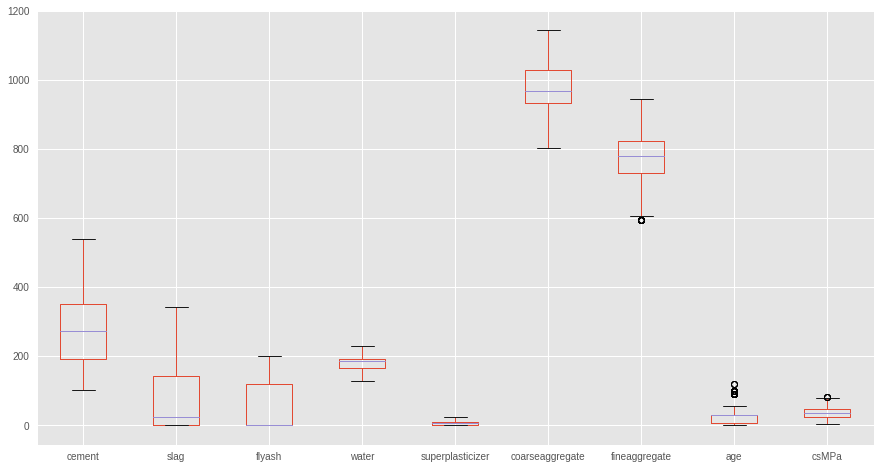

In [ ]:
concrete.boxplot(figsize = (15,8))

#Splitting the data into training and test sets

In [ ]:
#display info
concrete.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.30


In [ ]:
#add bias column
concrete['biascolumn'] = 1

In [ ]:
#re-display after adding bias column
concrete.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,biascolumn
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,1
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,1
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.27,1
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.05,1
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.30,1


In [ ]:
#data type
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
 9   biascolumn        1030 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 80.6 KB


In [ ]:
'''
#download cleaned data
from google.colab import files
concrete.to_csv('cleaned_Concrete_Data_Yeh.csv') 
files.download('cleaned_Concrete_Data_Yeh.csv')
'''

"\n#download cleaned data\nfrom google.colab import files\nconcrete.to_csv('cleaned_Concrete_Data_Yeh.csv') \nfiles.download('cleaned_Concrete_Data_Yeh.csv')\n"

In [ ]:
#Independent and dependent variable

X = concrete.drop('csMPa', axis = 1)
y = concrete['csMPa']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = MinMaxScaler()

In [ ]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

In [ ]:
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

#Descriptive Analysis

In [ ]:
concrete.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.240680,85.384419,0.00,0.000,22.000,142.725,342.1
flyash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.653107,20.603205,126.60,164.900,185.000,192.000,228.0
superplasticizer,1030.0,5.973592,5.477165,0.00,0.000,6.400,10.075,23.4
coarseaggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineaggregate,1030.0,772.546019,78.703232,594.00,730.950,779.400,822.200,945.0
age,1030.0,32.256311,27.803705,1.00,7.000,28.000,28.000,120.0
csMPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6
biascolumn,1030.0,1.000000,0.000000,1.00,1.000,1.000,1.000,1.0


#ML models

##Random Forest + Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# specify the range of hyperparameter values for the grid search to try out 
rfparam_grid = {'max_depth': [5, 10, 15], 'n_estimators': [1000], 'max_features': [2, 4, 6]}#, 'min_samples_split':[30, 40, 50], 'min_samples_leaf': [30, 40, 50]}

rf_model = RandomForestRegressor()
grid_search = GridSearchCV(rf_model, rfparam_grid, cv=10,
                          scoring="r2")

rf_model.fit(X_train_scaled, y_train)
grid_search.fit(X_train_scaled, y_train)

grid_search.best_params_

{'max_depth': 15, 'max_features': 6, 'n_estimators': 1000}

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
print(pd.DataFrame(rf_model.feature_importances_, columns = ['RF_Importance'], index = X_train_scaled.columns))

                  RF_Importance
cement                 0.338821
slag                   0.077899
flyash                 0.019660
water                  0.133380
superplasticizer       0.051056
coarseaggregate        0.028702
fineaggregate          0.033027
age                    0.317455
biascolumn             0.000000


In [ ]:
rftrain_acc_R = rf_model.score(X_train_scaled, y_train)
rftrain_acc_R

0.9817281242906534

In [ ]:
rf_train_model = grid_search.best_estimator_

rfX_train_prepared = X_train_scaled
rf_train_predictions = rf_train_model.predict(rfX_train_prepared)
rftrain_mse = metrics.mean_squared_error(y_train, rf_train_predictions)
rftrain_mse

4.975181626476903

In [ ]:
rftrain_rmse = sqrt(rftrain_mse)
rftrain_rmse

2.230511516777464

In [ ]:
rf_final_model = grid_search.best_estimator_

rfX_test_prepared = X_test_scaled
rf_final_predictions = rf_final_model.predict(rfX_test_prepared)

rf_final_r2 = metrics.r2_score(y_test, rf_final_predictions)

rf_final_r2

0.8799744533519408

In [ ]:
rf_final_mse = metrics.mean_squared_error(y_test, rf_final_predictions)
rf_final_mse

32.475824223578535

In [ ]:
rf_final_rmse = sqrt(rf_final_mse)
rf_final_rmse

5.698756375173318

In [ ]:
#Storage
results_1 = pd.DataFrame({'Algorithm':['Random Forest'], 'accuracy':rf_final_r2}, index = {'1'})
results = results_1[['Algorithm', 'accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.879974


##K-Fold CV Random Forest

In [ ]:
k = 10
kfold = KFold(n_splits = k, random_state = 42, shuffle = True)
Kacc_results = cross_val_score(rf_model, X, y, cv = kfold)
accuracy = np.mean(abs(Kacc_results))
accuracy

0.907014389940155

In [ ]:
Kacc_results

array([0.88622588, 0.89785222, 0.89152382, 0.92599429, 0.89246851,
       0.94158743, 0.93362783, 0.90799971, 0.89633395, 0.89653027])

In [ ]:
#Storage
random_re = pd.DataFrame({'Algorithm':['Random Forest Regressor k_fold'], 'accuracy':accuracy}, index = {'2'})
results = pd.concat([results, random_re])
results = results[['Algorithm', 'accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.879974
2,Random Forest Regressor k_fold,0.907014


##Gradient Boosting + Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# specify the range of hyperparameter values for the grid search to try out 
gbparam_grid = {'max_depth': [5,10,15], 'n_estimators': [1000], 'learning_rate':[0.2], 'loss':['huber'],
                'max_features': [2, 4, 6], 'min_samples_split':[30, 40, 50], 'min_samples_leaf': [30, 40, 50]}
gb_model = GradientBoostingRegressor()
grid_search = GridSearchCV(gb_model, gbparam_grid, cv=10,
                          scoring="r2")

gb_model.fit(X_train_scaled, y_train)
grid_search.fit(X_train_scaled, y_train)

grid_search.best_params_

{'learning_rate': 0.2,
 'loss': 'huber',
 'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 1000}

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
print(pd.DataFrame(gb_model.feature_importances_, columns = ['GB_Importance'], index = X_train_scaled.columns))

                  GB_Importance
cement                 0.314961
slag                   0.086231
flyash                 0.024474
water                  0.118085
superplasticizer       0.047344
coarseaggregate        0.014981
fineaggregate          0.031459
age                    0.362463
biascolumn             0.000000


In [ ]:
gbtrain_acc_R = gb_model.score(X_train_scaled, y_train)
gbtrain_acc_R

0.9451794566602537

In [ ]:
gb_train_model = grid_search.best_estimator_

gbX_train_prepared = X_train_scaled
gb_train_predictions = gb_train_model.predict(gbX_train_prepared)
gbtrain_mse = metrics.mean_squared_error(y_train, gb_train_predictions)
gbtrain_mse

5.017955696886499

In [ ]:
gbtrain_rmse = sqrt(gbtrain_mse)
gbtrain_rmse

2.240079395219397

In [ ]:
gb_final_model = grid_search.best_estimator_

gbX_test_prepared = X_test_scaled
gb_final_predictions = gb_final_model.predict(gbX_test_prepared)

gb_final_r2 = metrics.r2_score(y_test, gb_final_predictions)

gb_final_r2

0.923193033406084

In [ ]:
gb_final_mse = metrics.mean_squared_error(y_test, gb_final_predictions)
gb_final_mse

20.78198863417231

In [ ]:
gb_final_rmse = sqrt(gb_final_mse)
gb_final_rmse

4.5587266461340175

In [ ]:
#Storage
gradient_re = pd.DataFrame({'Algorithm':['Gradient Boosting'], 'accuracy':gb_final_r2}, index = {'3'})
results = pd.concat([results, gradient_re])
results = results[['Algorithm', 'accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.879974
2,Random Forest Regressor k_fold,0.907014
3,Gradient Boosting,0.923193


##K Fold CV Gradient Boosting Regressor

In [ ]:
k = 10
kfold = KFold(n_splits = k, random_state = 42, shuffle = True)
results_3 = cross_val_score(gb_final_model, X, y, cv = kfold)
accuracy = np.mean(abs(results_3))
accuracy

0.9358309034974314

In [ ]:
#Storage
gradient_k = pd.DataFrame({'Algorithm':['Gradient Boosting Regressor k_fold'], 'accuracy':accuracy}, index = {'4'})
results = pd.concat([results, gradient_k])
results = results[['Algorithm', 'accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.879974
2,Random Forest Regressor k_fold,0.907014
3,Gradient Boosting,0.923193
4,Gradient Boosting Regressor k_fold,0.935831


##XGBoost Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# specify the range of hyperparameter values for the grid search to try out 
xgbparam_grid = {'max_depth': [5], 'n_estimators': [1000], 'learning_rate': [0.1],
                 'min_samples_split':[30, 40, 50], 'min_samples_leaf': [30, 40, 50], 'verbosity': [0],
                 'colsample_bytree':[0.25, 0.5, 0.75], 'gamma':[0.25, 0.5, 0.75], 'subsample':[0.25, 0.5, 0.75]}
xgb_model = XGBRegressor()
grid_search = GridSearchCV(xgb_model, xgbparam_grid, cv=10,
                          scoring="r2")

xgb_model.fit(X_train_scaled, y_train)
grid_search.fit(X_train_scaled, y_train)

grid_search.best_params_

[07:27:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'colsample_bytree': 0.75,
 'gamma': 0.75,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 30,
 'min_samples_split': 30,
 'n_estimators': 1000,
 'subsample': 0.5,
 'verbosity': 0}

In [ ]:
xgbtrain_acc_R = xgb_model.score(X_train_scaled, y_train)
xgbtrain_acc_R

0.942696052203477

In [ ]:

xgb_train_model = grid_search.best_estimator_

xgbX_train_prepared = X_train_scaled
xgb_train_predictions = xgb_train_model.predict(xgbX_train_prepared)
xgbtrain_mse = metrics.mean_squared_error(y_train, xgb_train_predictions)
xgbtrain_mse

2.3629765586910123

In [ ]:
xgbtrain_rmse = sqrt(xgbtrain_mse)
xgbtrain_rmse

1.5371976316306932

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
print(pd.DataFrame(xgb_model.feature_importances_, columns = ['XGB_Importance'], index = X_train_scaled.columns))

                  XGB_Importance
cement                  0.275457
slag                    0.081403
flyash                  0.079218
water                   0.117305
superplasticizer        0.100353
coarseaggregate         0.018904
fineaggregate           0.042189
age                     0.285172
biascolumn              0.000000


In [ ]:
xgb_final_model = grid_search.best_estimator_

xgbX_test_prepared = X_test_scaled
xgb_final_predictions = xgb_final_model.predict(xgbX_test_prepared)

xgb_final_r2 = metrics.r2_score(y_test, xgb_final_predictions)

xgb_final_r2

0.9056343733824355

In [ ]:
xgb_final_mse = metrics.mean_squared_error(y_test, xgb_final_predictions)
xgb_final_mse

25.532910187578164

In [ ]:
xgb_final_rmse = sqrt(xgb_final_mse)
xgb_final_rmse

5.053010012614082

In [ ]:
#Storage
xgb_re = pd.DataFrame({'Algorithm':['XGBoost'], 'accuracy':xgb_final_r2}, index = {'5'})
results = pd.concat([results, xgb_re])
results = results[['Algorithm', 'accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.879974
2,Random Forest Regressor k_fold,0.907014
3,Gradient Boosting,0.923193
4,Gradient Boosting Regressor k_fold,0.935831
5,XGBoost,0.905634


##K Fold CV XGBoost

In [ ]:
k = 10
kfold = KFold(n_splits = k, random_state = 42, shuffle = True)
results_7 = cross_val_score(xgb_final_model, X, y, cv = kfold)
kfxgb_accuracy = np.mean(abs(results_7))
kfxgb_accuracy

0.9394209409740404

In [ ]:
#Storage
DecKFold_df = pd.DataFrame({'Algorithm':['XGBoost k fold'], 'accuracy':kfxgb_accuracy}, index = {'6'})
results = pd.concat([results, DecKFold_df])
results = results[['Algorithm', 'accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.879974
2,Random Forest Regressor k_fold,0.907014
3,Gradient Boosting,0.923193
4,Gradient Boosting Regressor k_fold,0.935831
5,XGBoost,0.905634
6,XGBoost k fold,0.939421


#Plotting result

In [ ]:
results

,Algorithm,accuracy
1,Random Forest,0.879974
2,Random Forest Regressor k_fold,0.907014
3,Gradient Boosting,0.923193
4,Gradient Boosting Regressor k_fold,0.935831
5,XGBoost,0.905634
6,XGBoost k fold,0.939421


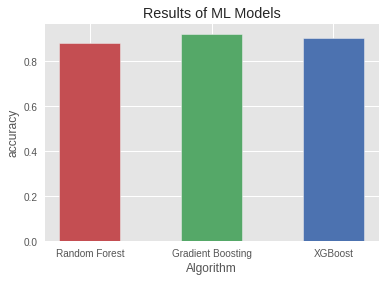

In [ ]:
#bar width
x = ['Random Forest', 'Gradient Boosting', 'XGBoost']
h = [results.accuracy[0], results.accuracy[2], results.accuracy[4]]
plt.bar(x[0], h[0], 0.5, color='r')
plt.bar(x[1], h[1], 0.5, color = 'g')
plt.bar(x[2], h[2], 0.5, color = 'b')
plt.xlabel('Algorithm')
plt.ylabel('accuracy')
plt.title('Results of ML Models')
plt.show()

##Random Forest Graph

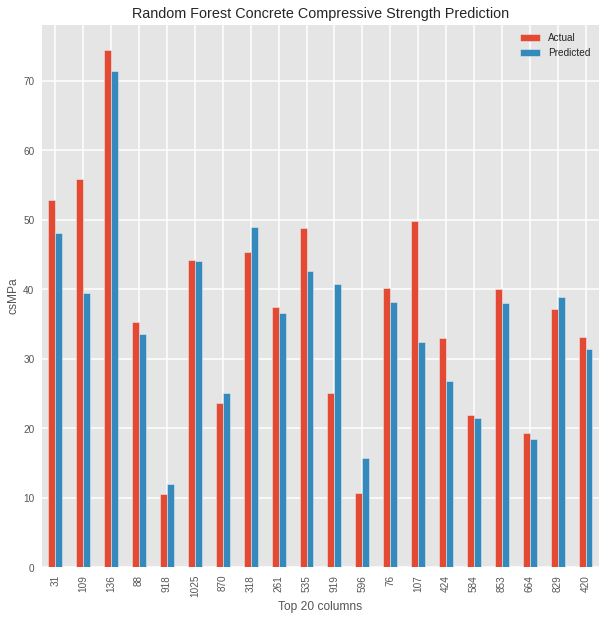

In [ ]:
#Plot of actual value vs predicted values
dat = pd.DataFrame({'Actual': y_test, 'Predicted': rf_final_predictions})
dat1=dat.head(20)
plt.style.use('ggplot')
dat1.plot(kind='bar',figsize=(10,10))

plt.grid(which='major', linestyle='-', linewidth='1.5', color='w')
plt.grid(which='minor', linestyle=':', linewidth='1.5', color='w')

plt.title('Random Forest Concrete Compressive Strength Prediction')
plt.ylabel('csMPa')
plt.xlabel('Top 20 columns')

plt.show()

##Gradient Boosting Graph

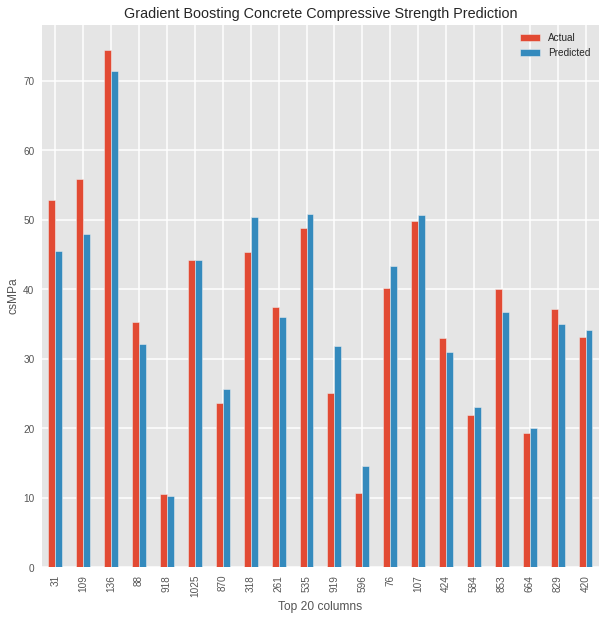

In [ ]:
#Plot of actual value vs predicted values
dat = pd.DataFrame({'Actual': y_test, 'Predicted': gb_final_predictions})
dat1=dat.head(20)
plt.style.use('ggplot')
dat1.plot(kind='bar',figsize=(10,10))

plt.grid(which='major', linestyle='-', linewidth='1.5', color='w')
plt.grid(which='minor', linestyle=':', linewidth='1.5', color='w')

plt.title('Gradient Boosting Concrete Compressive Strength Prediction')
plt.ylabel('csMPa')
plt.xlabel('Top 20 columns')

plt.show()

##XGBoost Graph

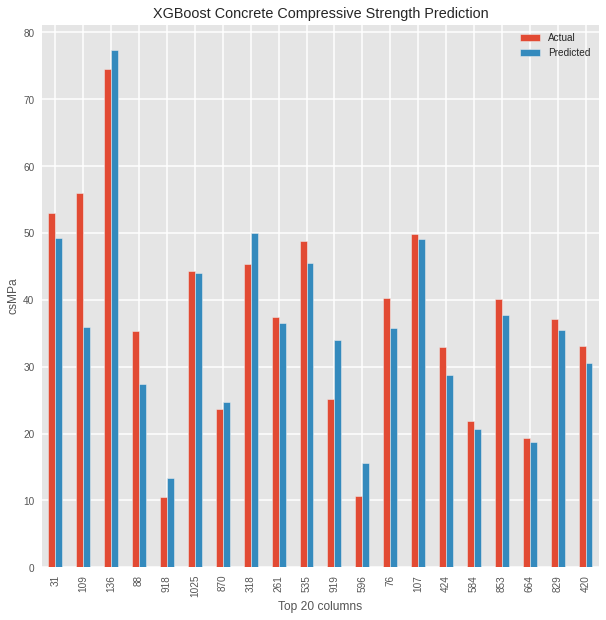

In [ ]:
#Plot of actual value vs predicted values
dat = pd.DataFrame({'Actual': y_test, 'Predicted': xgb_final_predictions})
dat1=dat.head(20)
plt.style.use('ggplot')
dat1.plot(kind='bar',figsize=(10,10))

plt.grid(which='major', linestyle='-', linewidth='1.5', color='w')
plt.grid(which='minor', linestyle=':', linewidth='1.5', color='w')

plt.title('XGBoost Concrete Compressive Strength Prediction')
plt.ylabel('csMPa')
plt.xlabel('Top 20 columns')

plt.show()

##All 3

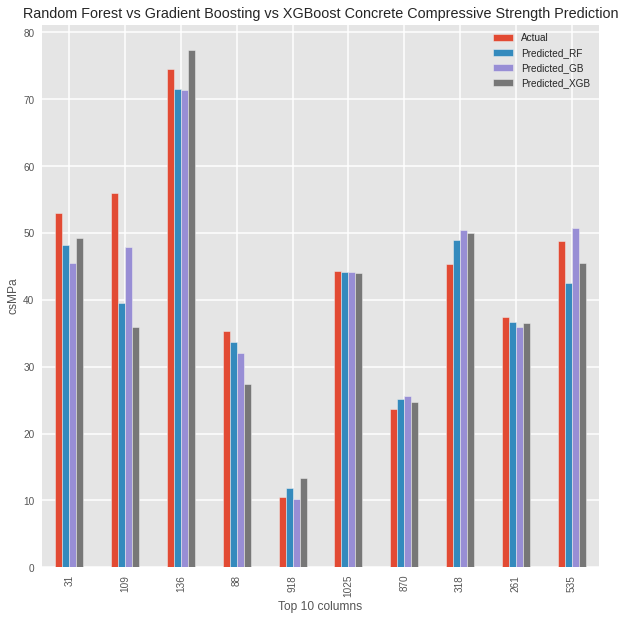

In [ ]:
#Plot of true value vs predicted values
dat = pd.DataFrame({'Actual': y_test, 'Predicted_RF': rf_final_predictions, 'Predicted_GB': gb_final_predictions, 'Predicted_XGB': xgb_final_predictions})
dat1 = dat.head(10) #sample of top 10 columns
plt.style.use('ggplot')
dat1.plot(kind='bar',figsize=(10,10))

plt.grid(which='major', linestyle='-', linewidth='1.5', color='w')
plt.grid(which='minor', linestyle=':', linewidth='1.5', color='w')

plt.title('Random Forest vs Gradient Boosting vs XGBoost Concrete Compressive Strength Prediction')
plt.ylabel('csMPa')
plt.xlabel('Top 10 columns')

plt.show()